# Name: Hrishikesh Mukund
# Exam 1 - Supervised Learning: Classification

In [214]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
import graphviz
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection

In [215]:
wine_df = pd.read_csv('wine_data.csv')

In [216]:
wine_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [217]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [218]:
wine_df.describe().T

count        mean        std      min         25%  \
fixed acidity         4898.0    6.854788   0.843868  3.80000    6.300000   
volatile acidity      4898.0    0.278241   0.100795  0.08000    0.210000   
citric acid           4898.0    0.334192   0.121020  0.00000    0.270000   
residual sugar        4898.0    6.391415   5.072058  0.60000    1.700000   
chlorides             4898.0    0.045772   0.021848  0.00900    0.036000   
free sulfur dioxide   4898.0   35.308085  17.007137  2.00000   23.000000   
total sulfur dioxide  4898.0  138.360657  42.498065  9.00000  108.000000   
density               4898.0    0.994027   0.002991  0.98711    0.991723   
pH                    4898.0    3.188267   0.151001  2.72000    3.090000   
sulphates             4898.0    0.489847   0.114126  0.22000    0.410000   
alcohol               4898.0   10.514267   1.230621  8.00000    9.500000   
quality               4898.0    5.877909   0.885639  3.00000    5.000000   

                            50%       75%        max  
fixed acidity           6.80000    7.3000   14.20000  
volatile acidity        0.26000    0.3200    1.10000  
citric acid             0.32000    0.3900    1.66000  
residual sugar          5.20000    9.9000   65.80000  
chlorides               0.04300    0.0500    0.34600  
free sulfur dioxide    34.00000   46.0000  289.00000  
total sulfur dioxide  134.00000  167.0000  440.00000  
density                 0.99374    0.9961    1.03898  
pH                      3.18000    3.2800    3.82000  
sulphates               0.47000    0.5500    1.08000  
alcohol                10.40000   11.4000   14.20000  
quality                 6.00000    6.0000    9.00000

In [219]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [220]:
wine_df.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

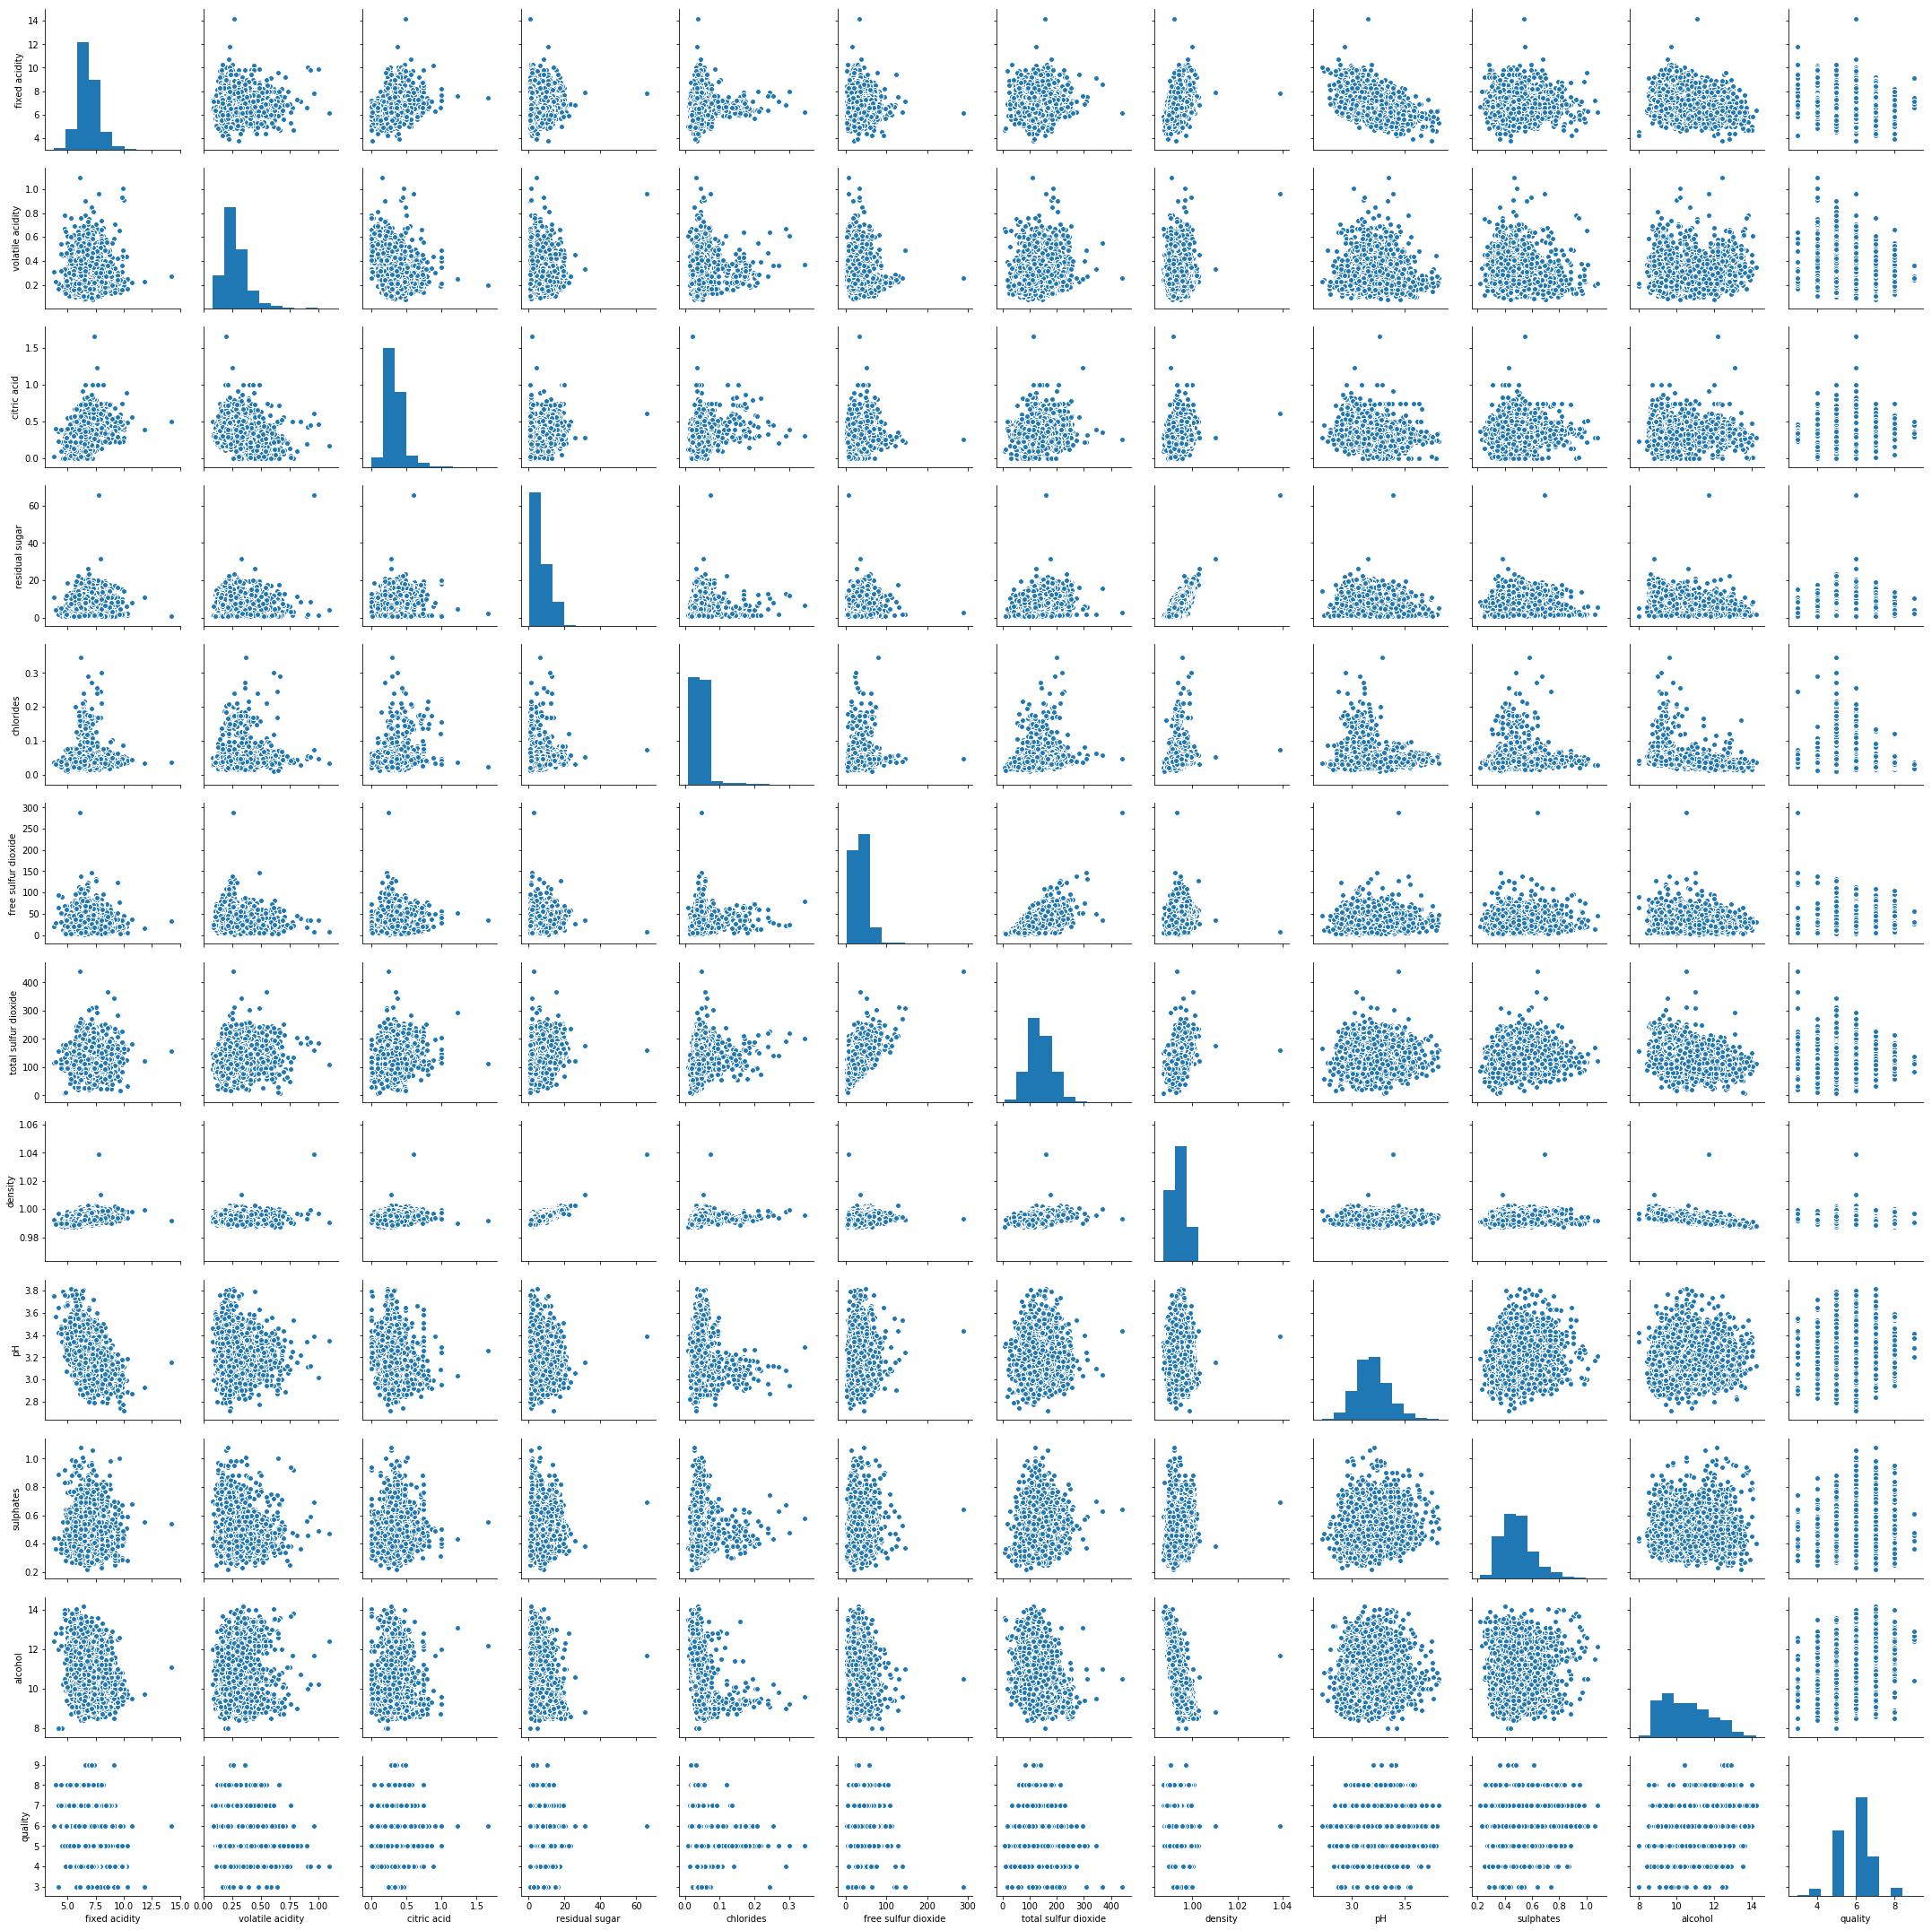

In [221]:
sns.pairplot(wine_df)
plt.show()

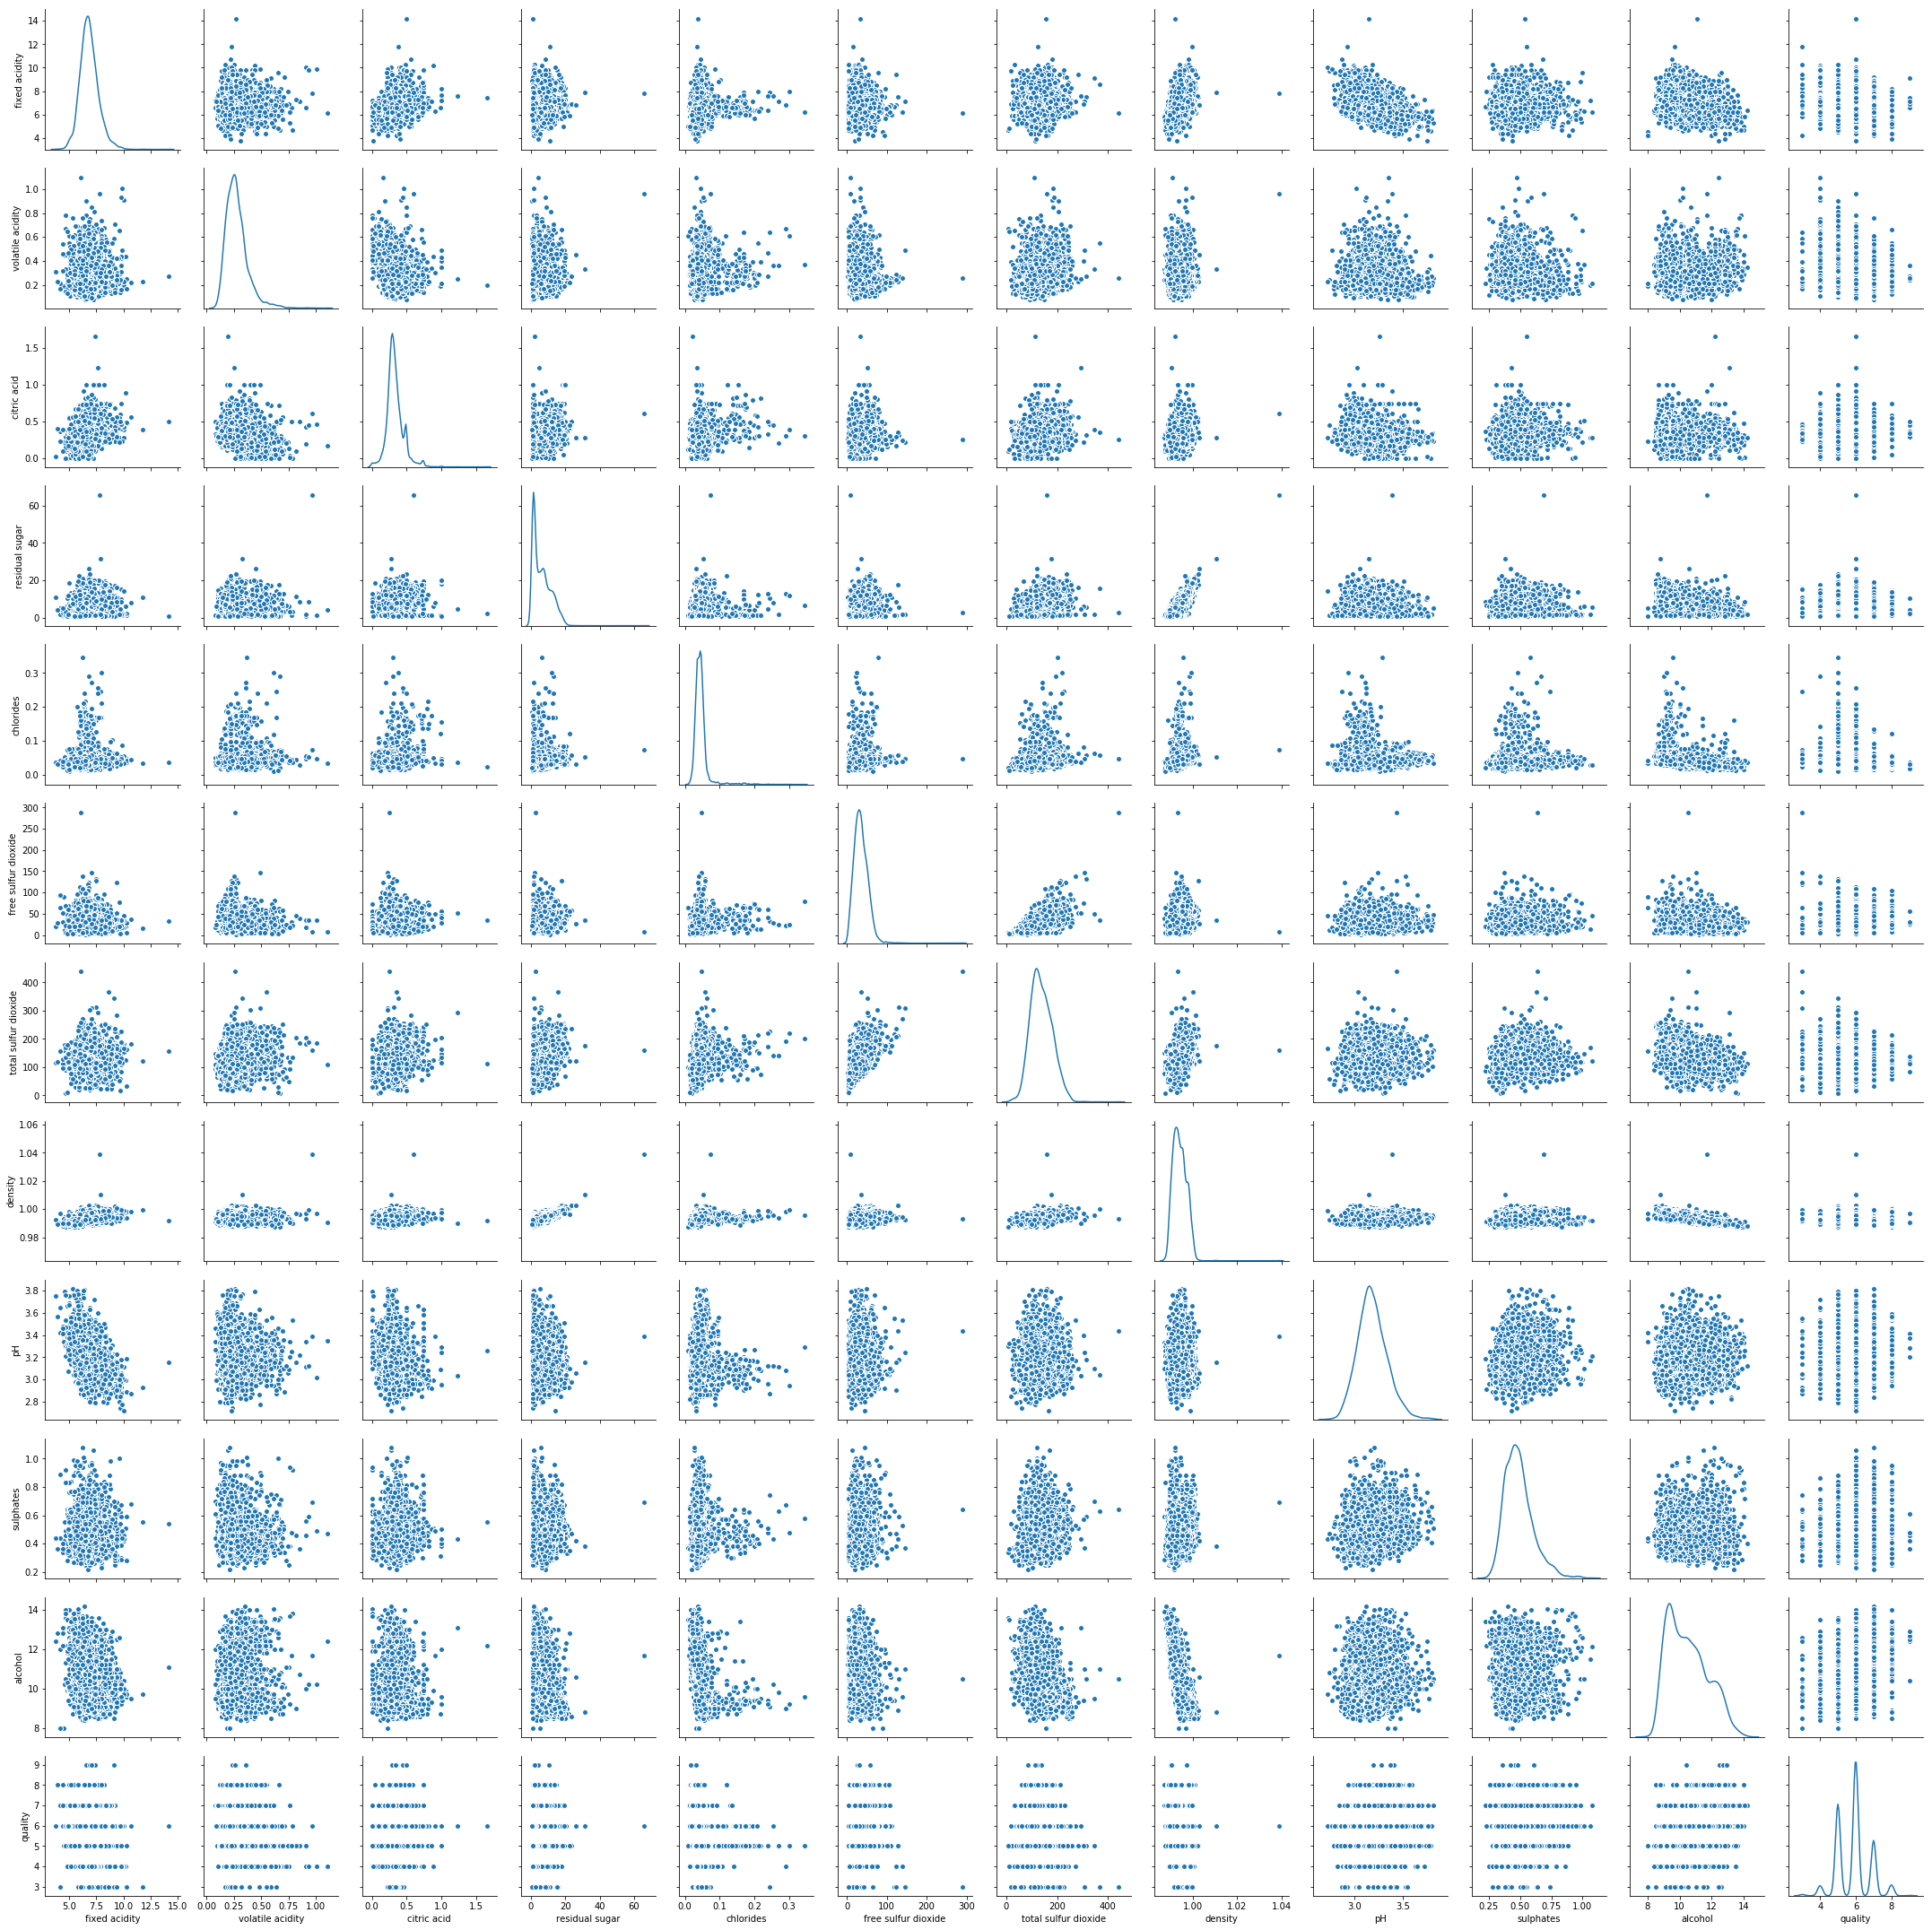

In [222]:
sns.pairplot(wine_df, diag_kind='kde')
plt.show()

### 1)	What can you comment on the variables? 

a) All of the continous variables in the data has a right skewed distribution and some have outliers. We can see them using box plots.

b) There are 4898 observations without any null values

c) From the pairplot, the scatter plots of variables to variables comparison shows very less or 0 correlation between each other

d) There are 7 categories for quality which is our target variable

e) We can also observe from the pairplots that there is no multicollinearity between the variables

### 2)	Do we need to do outlier treatment? What is the most apt method for this?

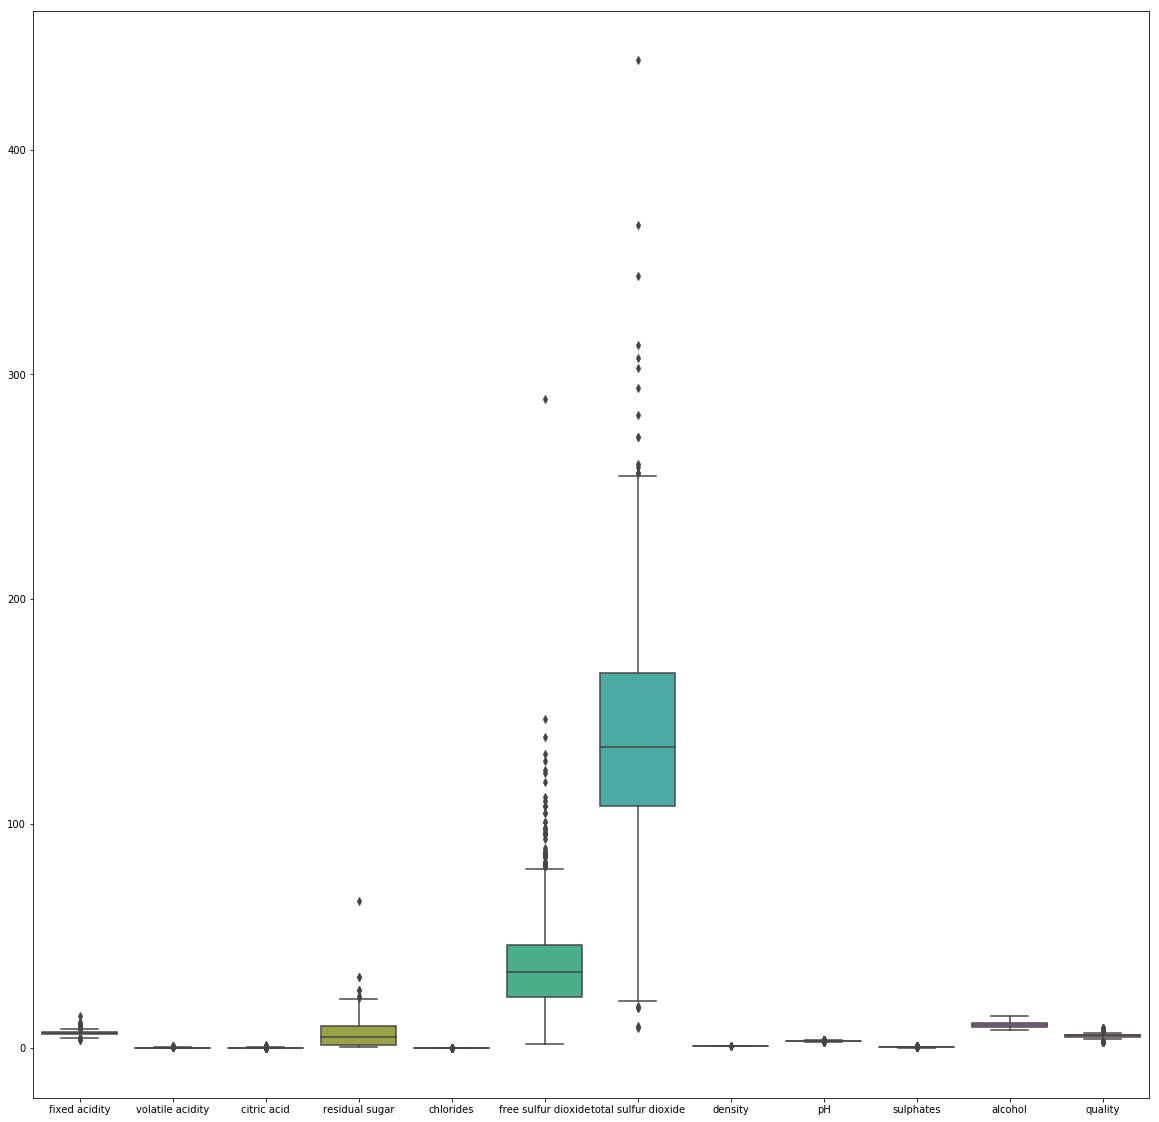

In [223]:
fig = plt.figure(figsize=(20,20))
sns.boxplot(data = wine_df)
plt.show()

From the boxplots, we can see that Residual Sugar, free sulphur dioxide and total sulphur dioxide have extreme values and extreme outliers. We can either choose to ignore these value or cap it to a certain value. 

Since residual sugar has just one outlier, we can choose to ignore the value


In [224]:
wine_df[wine_df['free sulfur dioxide'] > 115].count()

fixed acidity           8
volatile acidity        8
citric acid             8
residual sugar          8
chlorides               8
free sulfur dioxide     8
total sulfur dioxide    8
density                 8
pH                      8
sulphates               8
alcohol                 8
quality                 8
dtype: int64

In [225]:
wine_df[wine_df['total sulfur dioxide'] > 344].count()

fixed acidity           2
volatile acidity        2
citric acid             2
residual sugar          2
chlorides               2
free sulfur dioxide     2
total sulfur dioxide    2
density                 2
pH                      2
sulphates               2
alcohol                 2
quality                 2
dtype: int64

Let us cap the free sulphur dioxide to 115 and total sulphur dioxide to 344 as the outliers are very extreme. There are 8 observations in free sulphur dioxide and 2 in total sulphur dioxide with values greater than 115 and 344 respectively

In [226]:
wine_df['free sulfur dioxide'] = wine_df['free sulfur dioxide'].where(wine_df['free sulfur dioxide'] <= 115, 115)  

In [227]:
wine_df['total sulfur dioxide'] = wine_df['total sulfur dioxide'].where(wine_df['total sulfur dioxide'] <= 344, 344)  

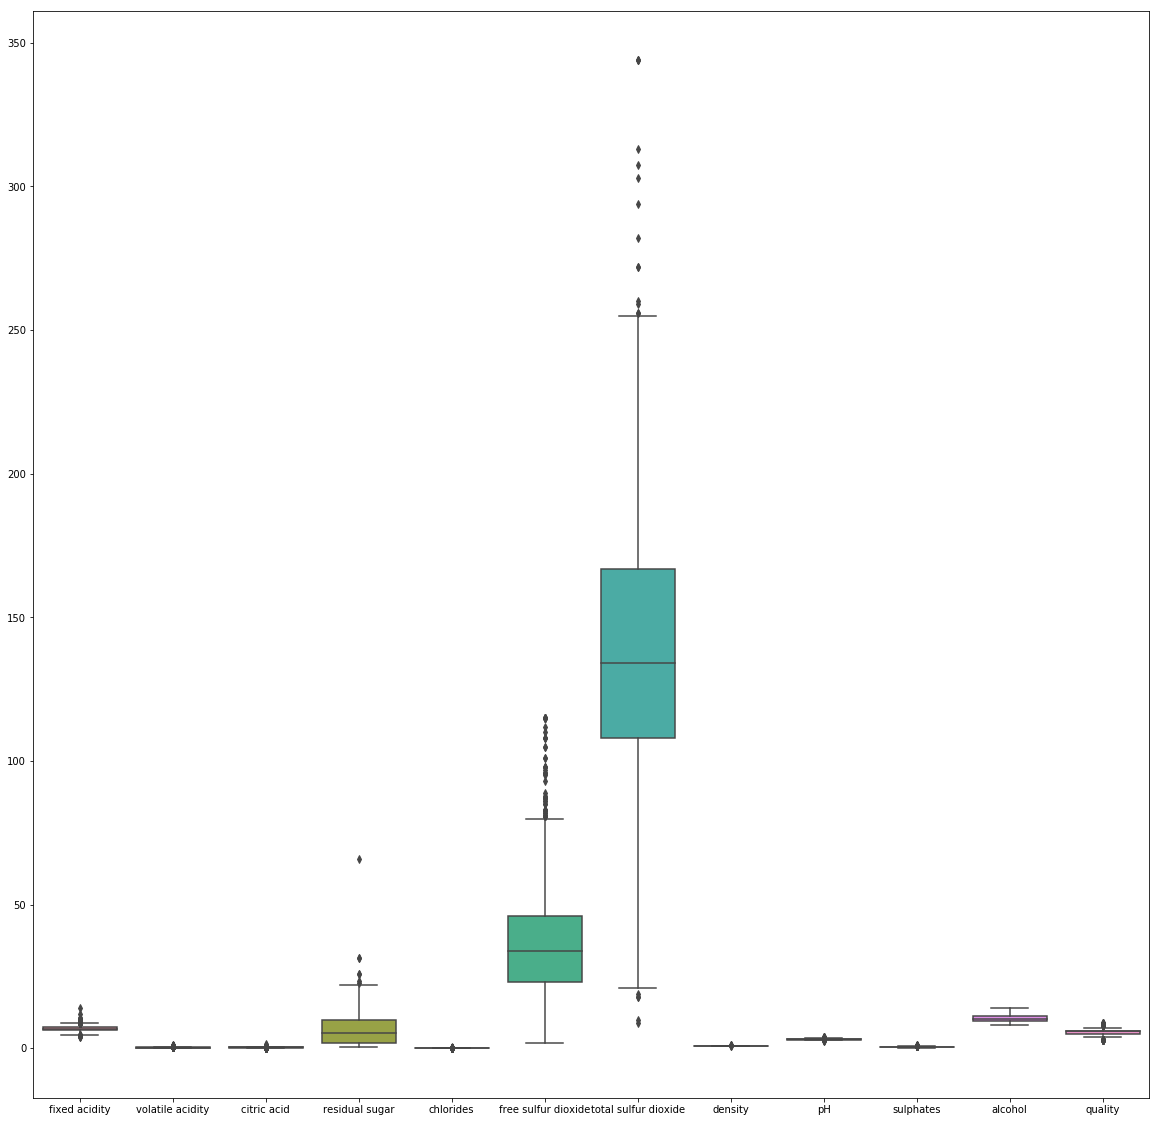

In [228]:
fig = plt.figure(figsize=(20,20))
sns.boxplot(data = wine_df)
plt.show()

The most apt method is capping the values. Choosing the cap values can be an outlier value or it can be the upper whisker. since the capped value is not an extreme outlier, this value is acceptable. Extreme outliers can be defined by 3 times the IQR value. The values are 115 and 344 for free sulphur dioxide and total suphur dioxide respectively

### 3) Does it make a business case to predict the quality of the wine?

The quality of the wine is usually measured by wine tasters. The professional wine tasters charge very high and hence, predicting the quality of wine using ML algorithms will reduce the expense of the wine sellers drastically. This can be a strong business case for the wine sellers.

### 4) Are we able to classify the type of wine given the predictors

Yes we will be able to classify the wine if the predictors are given. We can use any clustering methods to classify the wines. Let us use Kmeans clustering algorithm for example

In [229]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

In [230]:
wine_df_scaled = wine_df.apply(zscore)
wine_df_scaled.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.172097         -0.081770     0.213280        2.821349  -0.035355   
1      -0.657501          0.215896     0.048001       -0.944765   0.147747   
2       1.475751          0.017452     0.543838        0.100282   0.193523   
3       0.409125         -0.478657    -0.117278        0.415768   0.559727   
4       0.409125         -0.478657    -0.117278        0.415768   0.559727   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.589455              0.747609  2.331512 -1.246921  -0.349184   
1            -1.284965             -0.149611 -0.009154  0.740029   0.001342   
2            -0.317522             -0.975997  0.358665  0.475102  -0.436816   
3             0.710385              1.125386  0.525855  0.011480  -0.787342   
4             0.710385              1.125386  0.525855  0.011480  -0.787342   

    alcohol  quality  
0 -1.393152  0.13787  
1 -0.824276  0.13787  
2 -0.336667  0.13787  
3 -0.499203  0.13787  
4 -0.499203  0.13787

There are 7 categories for quality, based on the dataset. We can use 7 clusters for the KMeans clustering model to classify the data

In [231]:
model = KMeans(n_clusters = 7)
model.fit(wine_df_scaled)
labels = model.labels_
centrods = model.cluster_centers_
cluster_error = model.inertia_

In [232]:
wine_df_labels = pd.DataFrame(labels , columns = list(['labels']))
wine_df_labels['labels'] = wine_df_labels['labels'].astype('category')

In [233]:
wine_df_labels['labels'].value_counts()

5    946
3    896
2    892
4    835
1    753
0    473
6    103
Name: labels, dtype: int64

In [234]:
cluster_error

34184.16460184995

we can see 7 categories ( 0 to 6) with cluster error 34185. The cluster errors can be reduced by modifying the KMeans paramenters. After further analysis using clustering, we may be able to infer that any particular variable or variables may have hidden meaning to the data, which helps in making the predicion model more accurate

### 5) Which among the below methods will be your recommendation? Does this make business sense? how will this help in the real world?

1.	KNN 
2.	Decision trees - CART
3.	Naïve Bayes 


By using Train and Test split

In [235]:
X = wine_df.iloc [:,0:11].values
Y = wine_df.iloc [:, 11].values

In [236]:
#Split into 30% test data and 70% train data
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.3, 
                                                     random_state = 7)

In [237]:
#Scale the data
independent_scaler = StandardScaler()
X_train = independent_scaler.fit_transform (X_train) #fit and transform
X_test = independent_scaler.transform (X_test) # only transform

### Decision Tree Classifier

In [238]:
#Try for max_depth 10
DTClassifier = DecisionTreeClassifier (max_depth=10, random_state = 7)
DTClassifier.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=7,
            splitter='best')

In [239]:
Y_predict = DTClassifier.predict(X_test)


In [240]:
print(metrics.accuracy_score(Y_test,Y_predict))
print(metrics.confusion_matrix(Y_test,Y_predict))
print(metrics.classification_report(Y_test,Y_predict))

0.5523809523809524
[[  0   0   2   6   1   0   0]
 [  0  11  27  13   3   0   0]
 [  0   9 259 147  23   2   0]
 [  0   3 127 410 108   9   1]
 [  0   1  15 105 126   6   0]
 [  0   1   3  21  23   6   0]
 [  0   0   0   0   2   0   0]]
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         9
          4       0.44      0.20      0.28        54
          5       0.60      0.59      0.59       440
          6       0.58      0.62      0.60       658
          7       0.44      0.50      0.47       253
          8       0.26      0.11      0.16        54
          9       0.00      0.00      0.00         2

avg / total       0.54      0.55      0.54      1470



D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


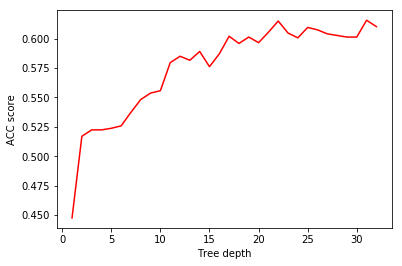

In [241]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, Y_train)
    Y_predict = dt.predict(X_test)
    acc_score = metrics.accuracy_score(Y_test,Y_predict)
    test_results.append(acc_score)
from matplotlib.legend_handler import HandlerLine2D
line2, = plt.plot(max_depths, test_results,'r', label="Test ACC")
plt.ylabel('ACC score')
plt.xlabel('Tree depth')
plt.show()

From the graph we can see that max_depth 24 will get the best accuracy score for decision tree classifier. If we have max_depth greater than 24, the model may lead to overfitting. Let us use 24 as max_depth in this case.

In [242]:
DTClassifier = DecisionTreeClassifier (max_depth=24, random_state = 7)
DTClassifier.fit(X_train,Y_train)
Y_predict = DTClassifier.predict(X_test)
print(metrics.accuracy_score(Y_test,Y_predict))
print(metrics.confusion_matrix(Y_test,Y_predict))
print(metrics.classification_report(Y_test,Y_predict))

0.6095238095238096
[[  0   1   2   5   1   0   0]
 [  0  16  18  14   5   0   1]
 [  2  11 278 121  25   3   0]
 [  6  11 112 431  83  14   1]
 [  0   1  15  68 149  19   1]
 [  0   0   3  16  13  22   0]
 [  0   0   0   0   2   0   0]]
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         9
          4       0.40      0.30      0.34        54
          5       0.65      0.63      0.64       440
          6       0.66      0.66      0.66       658
          7       0.54      0.59      0.56       253
          8       0.38      0.41      0.39        54
          9       0.00      0.00      0.00         2

avg / total       0.61      0.61      0.61      1470



In [243]:
# Tree Graph for reference
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
dot_data = export_graphviz(DTClassifier, out_file=None,  
                filled=True, rounded=True,
                special_characters=True)
graph = graphviz.Source(dot_data) 
graph


Accuracy for DT model for max_depth 24 is 0.6095

Average Precision is 0.61

Average recall is 0.61

In [244]:
print (pd.DataFrame(DTClassifier.feature_importances_, columns = ["Imp"], index = (['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates','alchohol'])))

                           Imp
fixed acidity         0.078838
volatile acidity      0.089680
citric acid           0.064553
residual sugar        0.089696
chlorides             0.079758
free sulfur dioxide   0.080203
total sulfur dioxide  0.101637
density               0.086460
pH                    0.109608
sulphates             0.069582
alchohol              0.149984


Let us drop variables to check the accuracy. We can use feature importance to check the importance of the variable in the model. "fixed_acidity" has lowest importance and lets try dropping that variable to check the accuracy of Decision Tree

In [245]:
X_modified = wine_df.iloc [:,1:11].values
Y = wine_df.iloc [:, 11].values

#Split into 30% test data and 70% train data
X_train_modified, X_test_modified, Y_train, Y_test = train_test_split (X_modified, Y, test_size = 0.3, 
                                                     random_state = 7)

#Scale the data
independent_scaler = StandardScaler()
X_train_modified = independent_scaler.fit_transform (X_train_modified) #fit and transform
X_test_modified = independent_scaler.transform (X_test_modified) # only transform

DTClassifier = DecisionTreeClassifier (max_depth=23, random_state = 7)
DTClassifier.fit(X_train_modified,Y_train)
Y_predict = DTClassifier.predict(X_test_modified)
print(metrics.accuracy_score(Y_test,Y_predict))
print(metrics.confusion_matrix(Y_test,Y_predict))
print(metrics.classification_report(Y_test,Y_predict))

0.6068027210884354
[[  0   1   2   6   0   0   0]
 [  0  15  17  19   3   0   0]
 [  0  13 274 127  22   4   0]
 [  1  12 115 439  70  21   0]
 [  0   5  14  71 143  19   1]
 [  0   1   4  18  10  21   0]
 [  0   0   0   2   0   0   0]]
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         9
          4       0.32      0.28      0.30        54
          5       0.64      0.62      0.63       440
          6       0.64      0.67      0.66       658
          7       0.58      0.57      0.57       253
          8       0.32      0.39      0.35        54
          9       0.00      0.00      0.00         2

avg / total       0.60      0.61      0.60      1470



Using feature importance, dropping one variable did not make an increase in the accuracy score and hence we can keep the variables

### Random forest Classifier

In [1]:
#First, let us build model with number of trees as 10 and we use entropy as criterion
RFClassifier = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state=7)
RFClassifier.fit(X_train,Y_train)

NameError: name 'RandomForestClassifier' is not defined

In [247]:
Y_predict = RFClassifier.predict(X_test)


In [248]:
print(metrics.accuracy_score(Y_test,Y_predict))
print(metrics.confusion_matrix(Y_test,Y_predict))
print(metrics.classification_report(Y_test,Y_predict))

0.64421768707483
[[  0   0   5   4   0   0   0]
 [  1   9  29  13   2   0   0]
 [  0   6 308 116  10   0   0]
 [  0   2 118 484  53   1   0]
 [  0   0  11 105 133   4   0]
 [  0   0   4  19  18  13   0]
 [  0   0   0   0   1   1   0]]
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         9
          4       0.53      0.17      0.25        54
          5       0.65      0.70      0.67       440
          6       0.65      0.74      0.69       658
          7       0.61      0.53      0.57       253
          8       0.68      0.24      0.36        54
          9       0.00      0.00      0.00         2

avg / total       0.64      0.64      0.63      1470



D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


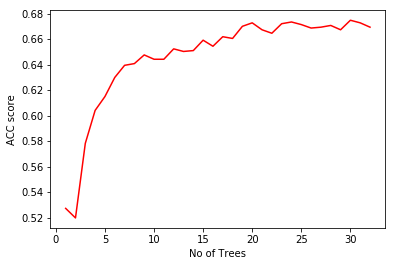

In [249]:
no_of_trees = np.linspace(1, 32, 32, endpoint=True)
test_results = []
for tree in no_of_trees:
    dt = RandomForestClassifier(n_estimators=tree.astype(int),criterion = 'entropy', random_state=7)
    dt.fit(X_train, Y_train)
    Y_predict = dt.predict(X_test)
    acc_score = metrics.accuracy_score(Y_test,Y_predict)
    test_results.append(acc_score)
from matplotlib.legend_handler import HandlerLine2D
line2, = plt.plot(no_of_trees, test_results,'r', label="Test ACC")
plt.ylabel('ACC score')
plt.xlabel('No of Trees')
plt.show()

From the graph we can see that n_estimators 20 will get the best accuracy score for random forest classifier. If we have n_estimators greater than 20, the model may lead to overfitting. Let us use 20 as n_estimators in this case.

In [250]:
RFClassifier = RandomForestClassifier(n_estimators=20, criterion = 'entropy', random_state=7)
RFClassifier.fit(X_train,Y_train)
Y_predict = RFClassifier.predict(X_test)
print(metrics.accuracy_score(Y_test,Y_predict))
print(metrics.confusion_matrix(Y_test,Y_predict))
print(metrics.classification_report(Y_test,Y_predict))

0.6727891156462585
[[  0   0   2   7   0   0   0]
 [  0  12  26  15   1   0   0]
 [  0   6 309 115  10   0   0]
 [  0   2  90 518  47   1   0]
 [  0   0   2 116 133   2   0]
 [  0   0   2  19  16  17   0]
 [  0   0   0   2   0   0   0]]
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         9
          4       0.60      0.22      0.32        54
          5       0.72      0.70      0.71       440
          6       0.65      0.79      0.71       658
          7       0.64      0.53      0.58       253
          8       0.85      0.31      0.46        54
          9       0.00      0.00      0.00         2

avg / total       0.67      0.67      0.66      1470



D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy for RF model for n_estimators 20 is 0.6727

Average Precision is 0.67

Average recall is 0.67

### K Nearest Neighbours

In [251]:
#First, lets choose number of neighbours to be 21 and metric to be euclidean. We can also use manhattan distance
KNClassifier = KNeighborsClassifier(n_neighbors= 21 , metric='euclidean')
KNClassifier.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=21, p=2,
           weights='uniform')

In [252]:
Y_predict = KNClassifier.predict(X_test)
Y_predict

array([6, 6, 7, ..., 6, 5, 7], dtype=int64)

In [253]:
print(metrics.accuracy_score(Y_test,Y_predict))
print(metrics.confusion_matrix(Y_test,Y_predict))
print(metrics.classification_report(Y_test,Y_predict))

0.5571428571428572
[[  0   0   5   4   0   0   0]
 [  0   3  33  18   0   0   0]
 [  0   3 249 172  16   0   0]
 [  0   0 130 469  58   1   0]
 [  0   0  10 145  98   0   0]
 [  0   0   4  23  27   0   0]
 [  0   0   0   0   2   0   0]]
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         9
          4       0.50      0.06      0.10        54
          5       0.58      0.57      0.57       440
          6       0.56      0.71      0.63       658
          7       0.49      0.39      0.43       253
          8       0.00      0.00      0.00        54
          9       0.00      0.00      0.00         2

avg / total       0.53      0.56      0.53      1470



D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


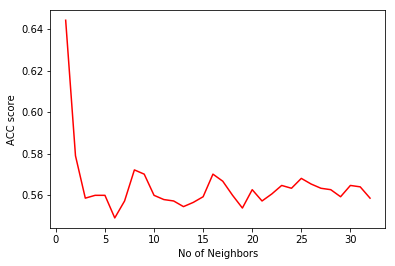

In [254]:
no_of_neighbors = np.linspace(1, 32, 32, endpoint=True)
test_results = []
for neighbor in no_of_trees:
    dt = KNeighborsClassifier(n_neighbors=neighbor.astype(int),metric='euclidean')
    dt.fit(X_train, Y_train)
    Y_predict = dt.predict(X_test)
    acc_score = metrics.accuracy_score(Y_test,Y_predict)
    test_results.append(acc_score)
from matplotlib.legend_handler import HandlerLine2D
line2, = plt.plot(no_of_neighbors, test_results,'r', label="Test ACC")
plt.ylabel('ACC score')
plt.xlabel('No of Neighbors')
plt.show()

The accuracy score is highest for 2 neighbors but since we KNN is a lazy learner algorithm we need to take 17 as the neighbors which has the next best accuracy score

In [255]:
KNClassifier = KNeighborsClassifier(n_neighbors= 17 , metric='euclidean')
KNClassifier.fit(X_train,Y_train)
Y_predict = KNClassifier.predict(X_test)
print(metrics.accuracy_score(Y_test,Y_predict))
print(metrics.confusion_matrix(Y_test,Y_predict))
print(metrics.classification_report(Y_test,Y_predict))

0.5666666666666667
[[  0   0   4   5   0   0   0]
 [  0   5  31  16   2   0   0]
 [  0   2 265 156  17   0   0]
 [  0   0 131 459  66   2   0]
 [  0   0  12 137 103   1   0]
 [  0   0   5  20  28   1   0]
 [  0   0   0   0   2   0   0]]
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         9
          4       0.71      0.09      0.16        54
          5       0.59      0.60      0.60       440
          6       0.58      0.70      0.63       658
          7       0.47      0.41      0.44       253
          8       0.25      0.02      0.03        54
          9       0.00      0.00      0.00         2

avg / total       0.55      0.57      0.54      1470



D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy for KNN model for n_neighbors 17 is 0.5666

Average Precision is 0.55

Average recall is 0.57

### Naive Bayes

In [256]:
NBClassifier = GaussianNB()
NBClassifier.fit(X_train,Y_train)

GaussianNB(priors=None)

In [257]:
Y_predict = NBClassifier.predict(X_test)

In [258]:
print(metrics.accuracy_score(Y_test,Y_predict))
print(metrics.confusion_matrix(Y_test,Y_predict))
print(metrics.classification_report(Y_test,Y_predict))

0.42108843537414964
[[  2   2   1   1   3   0   0]
 [  2  11  18  14   9   0   0]
 [  7  27 241 113  52   0   0]
 [  5   9 196 196 248   4   0]
 [  1   0  33  47 167   5   0]
 [  0   0   7  13  32   2   0]
 [  0   0   0   0   2   0   0]]
             precision    recall  f1-score   support

          3       0.12      0.22      0.15         9
          4       0.22      0.20      0.21        54
          5       0.49      0.55      0.51       440
          6       0.51      0.30      0.38       658
          7       0.33      0.66      0.44       253
          8       0.18      0.04      0.06        54
          9       0.00      0.00      0.00         2

avg / total       0.45      0.42      0.41      1470



D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy for Naive Bayes model is 0.4210

Average Precision is 0.45

Average recall is 0.42

After building these 4 models, we can conclude that the Random forest classification model has best accuracy score of 0.6727 with 20 trees, when we use train and test split of 70% and 30%

Now let us calculate the accuracies using Kfold method

In [259]:
#Scale the data
independent_scaler = StandardScaler()
X_scaled = independent_scaler.fit_transform (X) #fit and transform

DT: 0.411807 (0.019985)
RF: 0.514303 (0.030746)
KNN: 0.519406 (0.038489)
NB: 0.435064 (0.026211)


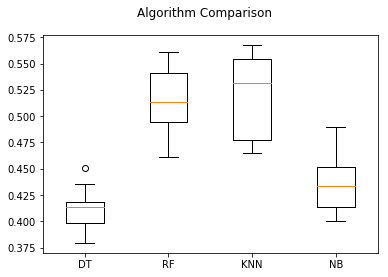

In [260]:
models = []
models.append(('DT', DecisionTreeClassifier(max_depth=24, random_state = 7)))
models.append(('RF', RandomForestClassifier(n_estimators=20, criterion = 'entropy', random_state=7)))
models.append(('KNN', KNeighborsClassifier(n_neighbors= 17 , metric='euclidean')))
models.append(('NB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=12345)
    cv_results = model_selection.cross_val_score(model, X_scaled, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

By using train and test split, the recommended algorithm to be used is Random Forest as it gave the best accuracy score of 0.6727

While running this model with future incoming data of the various wines. Further analysis can be done for wine data using unsupervised learning and clustering to improve the model accuracy. The quality can be predicted. We can use this model as hiring wine tasters will prove to be very expensive in real world scenarios.


By using the Kfold method, we can see that Random forest algorith average accuracy score is 0.514 and KNN is 0.519. We can use either of these models but since RF has lesse standard deviation, the user can use RF model